# Customer Churn Predictions
### By Fayez Abu-Ajamieh

## Data Cleaning

In [152]:
# Import Libraries and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('churn_data.csv')

In [153]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [154]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [155]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [156]:
# Check if there are any null values and see how many
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [157]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [158]:
# Remove nulls
dataset = dataset[pd.notnull(dataset['age'])]

In [159]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

## Data Visualization

In [160]:
# Drop response and user id
dataset2 = dataset.drop(columns=['user','churn'])

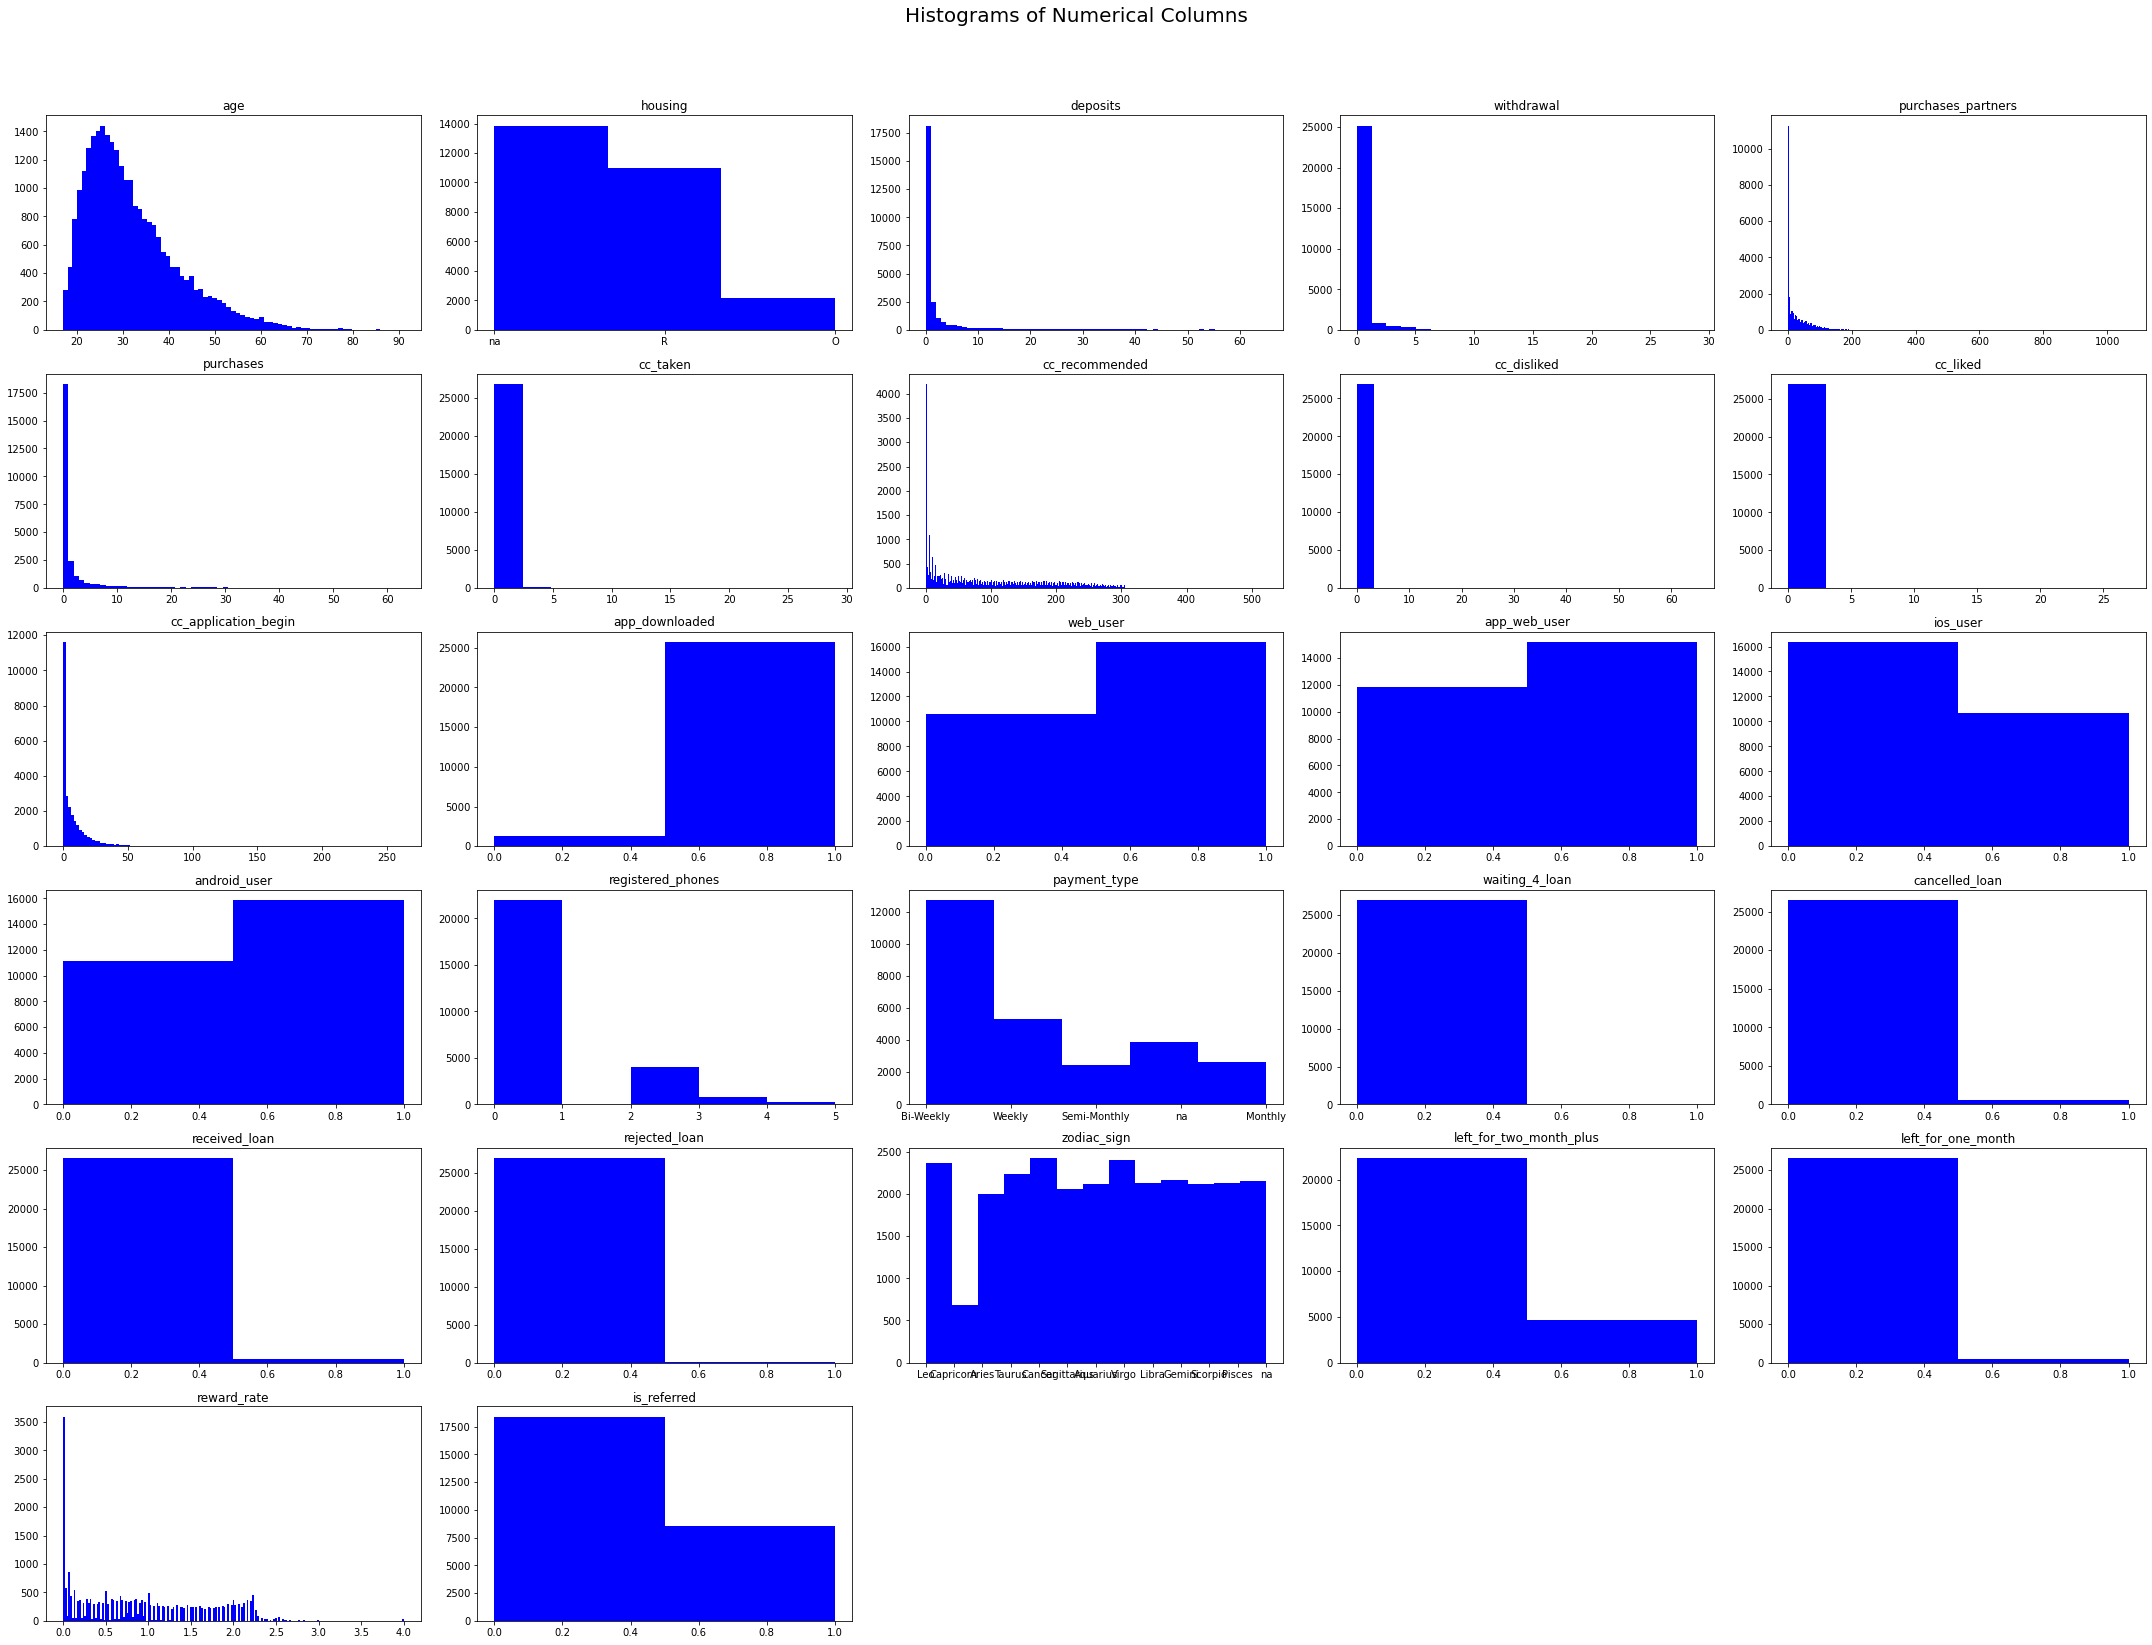

In [161]:
# Plot Histograms
plt.figure(figsize=(30,24))
plt.suptitle('Histograms of Numerical Columns', fontsize =20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(6,5,i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    vals = np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1],bins = vals, color='blue')
plt.tight_layout(rect=[0,0.03,1,0.95])

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


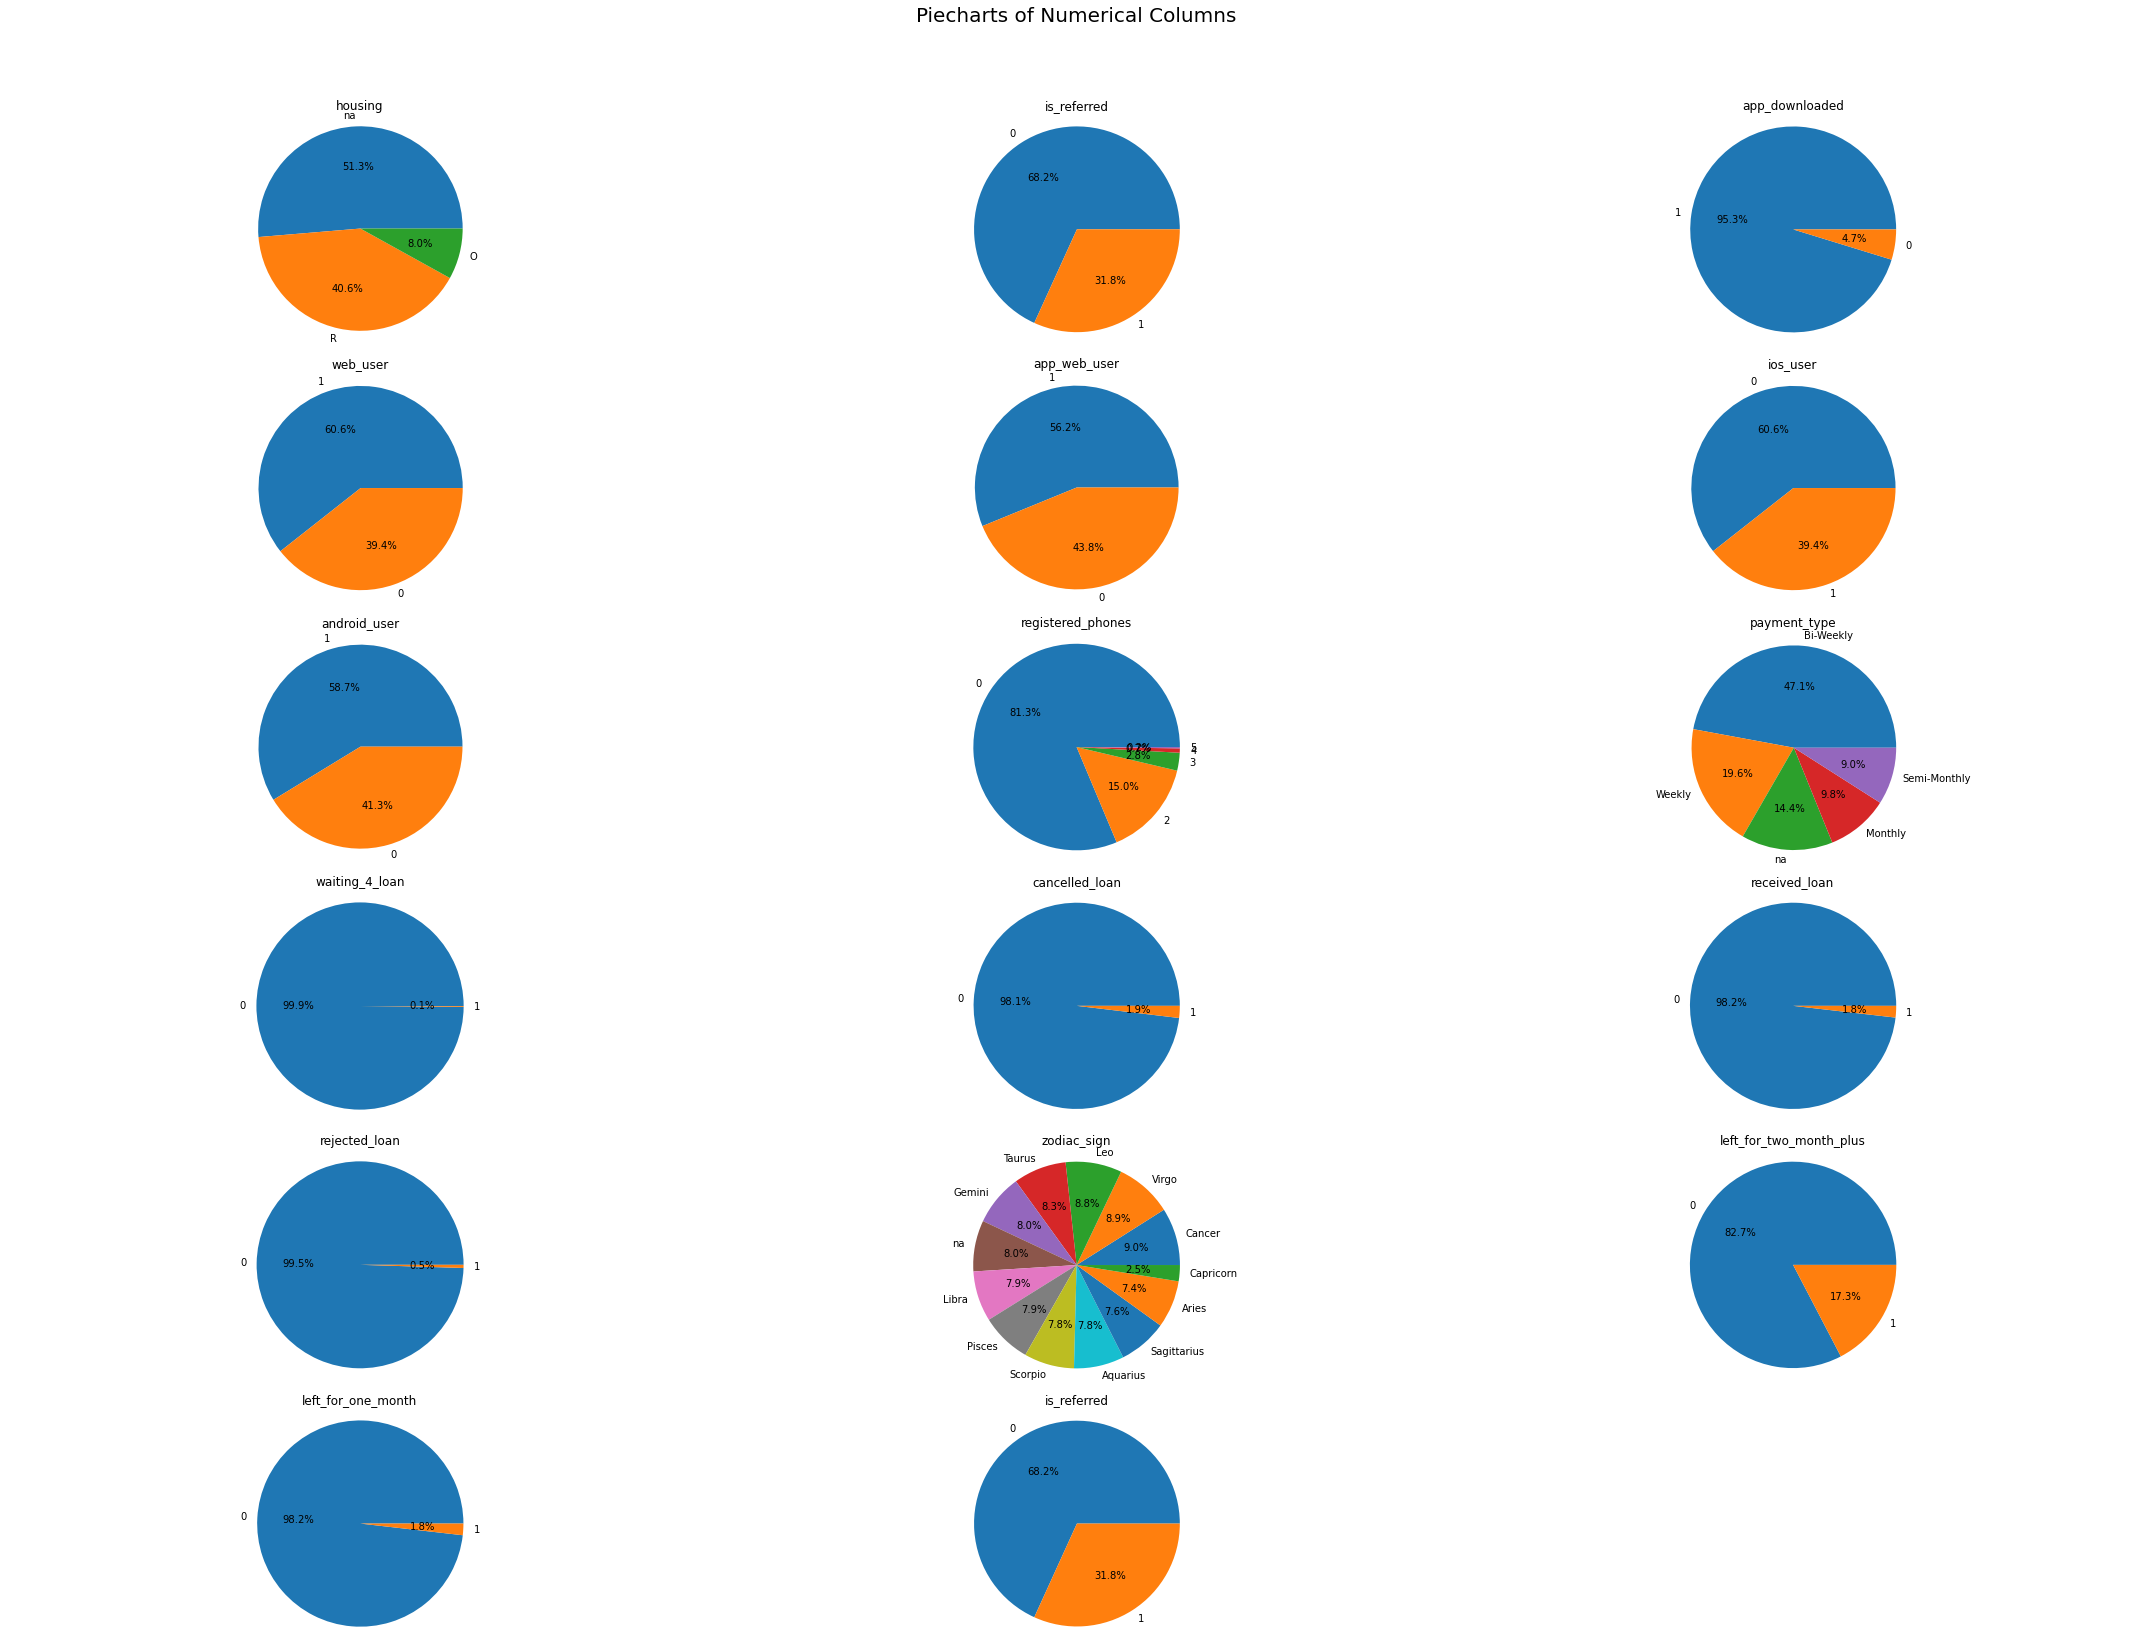

In [162]:
# Plot Pie Charts for Categorical Data

dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

plt.figure(figsize=(30,24))
plt.suptitle('Piecharts of Numerical Columns', fontsize =20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(6,3,i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    values = dataset2.iloc[:,i-1].value_counts(normalize=True).values
    index = dataset2.iloc[:,i-1].value_counts(normalize=True).index
    
    plt.pie(values,labels = index, autopct='%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0,0.03,1,0.95])

In [163]:
# Explore data further
dataset[dataset2.waiting_4_loan ==1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [164]:
dataset[dataset2.cancelled_loan ==1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [165]:
dataset[dataset2.received_loan ==1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [166]:
dataset[dataset2.rejected_loan ==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [167]:
dataset[dataset2.left_for_one_month ==1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

<module 'matplotlib.pyplot' from '/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

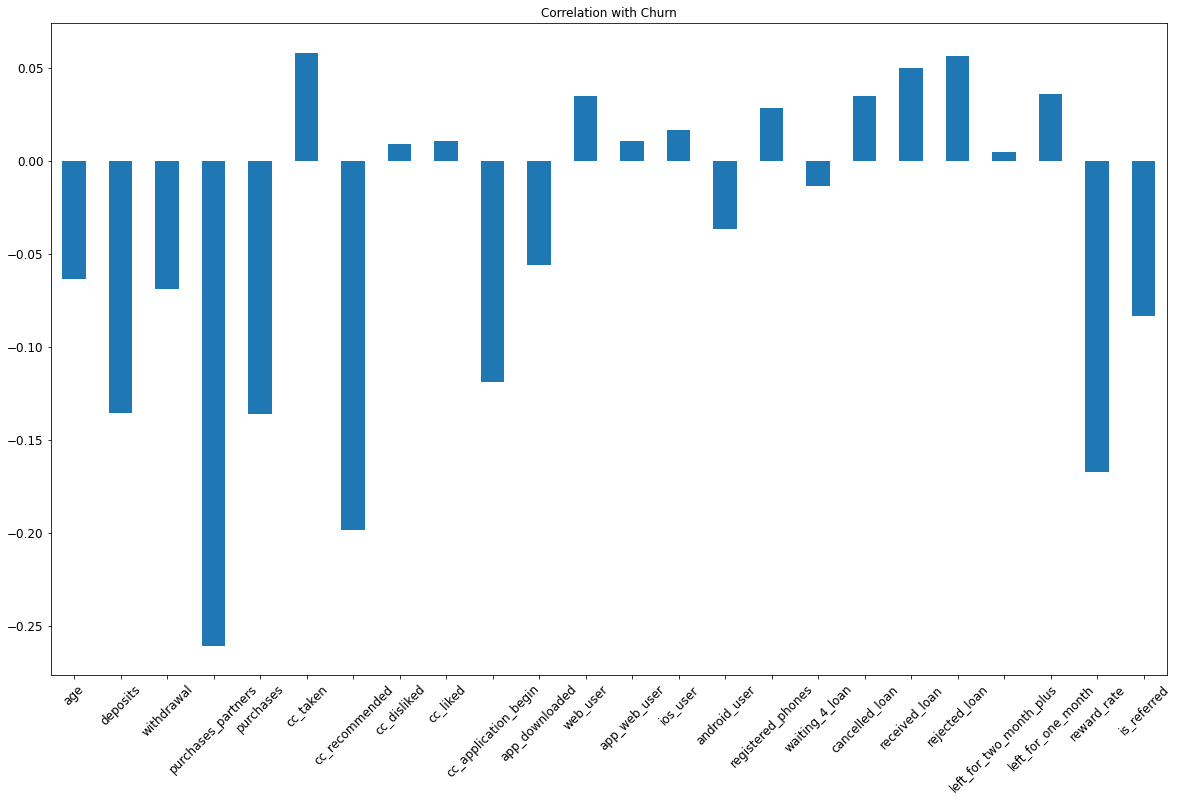

In [168]:
# Check Correlations
dataset.drop(columns=['churn','user', 'housing',
                      'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(figsize=(20,12), fontsize = 12, rot=45,
                                                                                      title = 'Correlation with Churn')
plt

<AxesSubplot:>

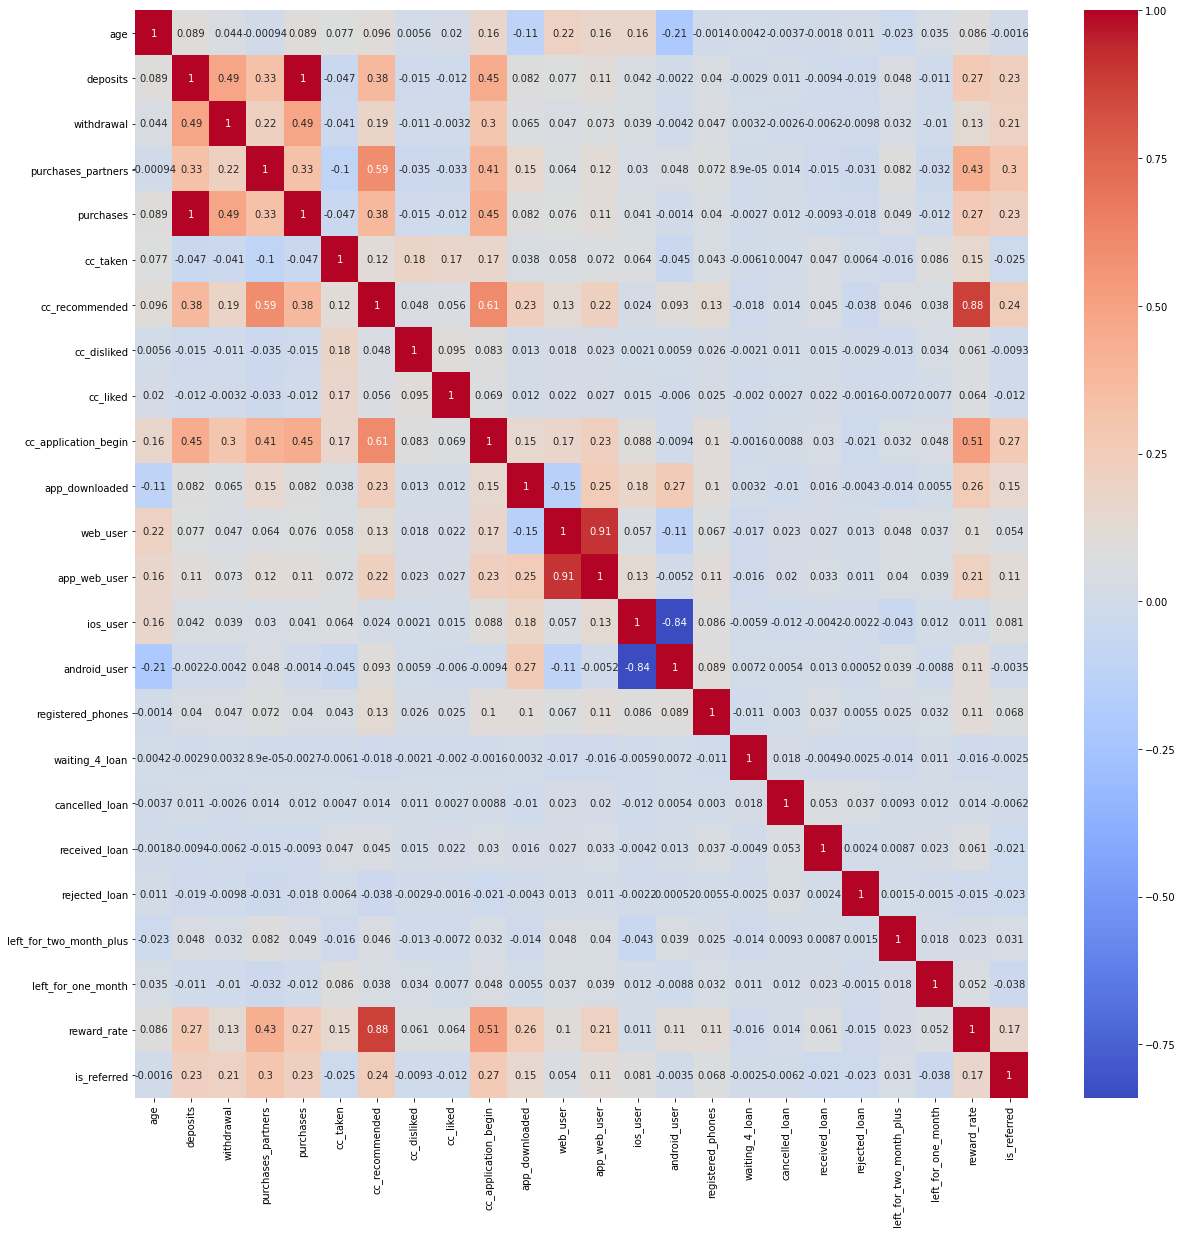

In [169]:
dataset3 = dataset.drop(columns=['user','churn'])
plt.figure(figsize=(20,20))                        
sns.heatmap(dataset3.corr(),annot=True,cmap='coolwarm')

In [170]:
# Remove strongly correlated features
dataset = dataset.drop(columns=['app_web_user','android_user'])

In [171]:
dataset.to_csv('New_churn_data.csv',index = False)

## Data Preprocessing

In [172]:
# Load new dataset
dataset = pd.read_csv('New_churn_data.csv')

In [173]:
# store user ID in seprate dataframe and remove it from original one
user_identifier = dataset['user']
dataset = dataset.drop(columns=['user'])

In [174]:
# One Hot Encoding of categorical Data
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [175]:
dataset = dataset.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

In [176]:
# Train test split

X = dataset.drop(columns=['churn'])
y = dataset['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
# Balancing the training set
y_train.value_counts()

0    12668
1     8928
Name: churn, dtype: int64

In [178]:
# Split +ve and -ve responses
pos_index = y_train[y_train==1].index
neg_index = y_train[y_train==0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index
    
np.random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
new_indices = np.concatenate((lower,higher))

X_train = X_train.loc[new_indices, ]
y_train = y_train[new_indices]

In [179]:
# Scale features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Cast into Dataframe
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))

# Restore column names and indices
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

In [180]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
14372,1.008576,-0.356198,-0.285885,-0.588181,-0.355868,-0.16873,-1.017695,-0.059453,-0.051911,-0.656973,...,-0.311028,-0.158947,-0.295839,-0.310053,-0.296845,-0.299295,-0.281725,-0.288841,-0.298628,-0.312002
16222,-0.203691,-0.009318,-0.285885,-0.004361,-0.001581,-0.16873,-0.502295,-0.059453,-0.051911,-0.322780,...,-0.311028,-0.158947,-0.295839,-0.310053,-0.296845,-0.299295,-0.281725,-0.288841,-0.298628,-0.312002
20330,-0.607780,-0.356198,-0.285885,-0.636833,-0.355868,-0.16873,-0.948975,-0.059453,-0.051911,-0.656973,...,-0.311028,-0.158947,-0.295839,-0.310053,-0.296845,-0.299295,-0.281725,-0.288841,3.348642,-0.312002
2074,-0.809824,-0.356198,-0.285885,-0.636833,-0.355868,-0.16873,-0.502295,-0.059453,-0.051911,-0.406328,...,-0.311028,-0.158947,-0.295839,-0.310053,-0.296845,-0.299295,-0.281725,-0.288841,-0.298628,-0.312002
25527,0.806531,1.031322,1.642623,-0.636833,0.825089,-0.16873,-0.376309,-0.059453,-0.051911,-0.239232,...,-0.311028,-0.158947,-0.295839,-0.310053,-0.296845,-0.299295,-0.281725,-0.288841,-0.298628,-0.312002


In [181]:
X_test.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
22706,-0.102669,-0.356198,-0.285885,-0.296271,-0.355868,-0.16873,0.356704,-0.059453,-0.051911,-0.489877,...,-0.311028,-0.158947,-0.295839,-0.310053,-0.296845,-0.299295,-0.281725,3.462107,-0.298628,-0.312002
11335,0.402443,-0.356198,-0.285885,-0.539530,-0.355868,-0.16873,-0.960428,-0.059453,-0.051911,-0.656973,...,-0.311028,-0.158947,-0.295839,-0.310053,-0.296845,-0.299295,3.549562,-0.288841,-0.298628,-0.312002
11719,0.099376,-0.240572,-0.285885,0.263224,-0.237772,-0.16873,-0.067069,-0.059453,-0.051911,0.178508,...,-0.311028,-0.158947,-0.295839,-0.310053,-0.296845,-0.299295,-0.281725,3.462107,-0.298628,-0.312002
21973,-0.405735,-0.356198,-0.285885,-0.636833,-0.355868,-0.16873,-0.273229,-0.059453,-0.051911,-0.406328,...,-0.311028,-0.158947,-0.295839,-0.310053,-0.296845,-0.299295,3.549562,-0.288841,-0.298628,-0.312002
26315,-0.708802,-0.356198,-0.285885,-0.636833,-0.355868,-0.16873,-1.017695,-0.059453,-0.051911,-0.656973,...,-0.311028,-0.158947,-0.295839,-0.310053,-0.296845,-0.299295,-0.281725,-0.288841,-0.298628,-0.312002


## Build Model

In [182]:
# Import model and fit to training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [183]:
# Make predictions

predictions = classifier.predict(X_test)

## Model Evaluation 

In [184]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1726 1428]
 [ 607 1639]]


              precision    recall  f1-score   support

           0       0.74      0.55      0.63      3154
           1       0.53      0.73      0.62      2246

    accuracy                           0.62      5400
   macro avg       0.64      0.64      0.62      5400
weighted avg       0.65      0.62      0.62      5400



<AxesSubplot:>

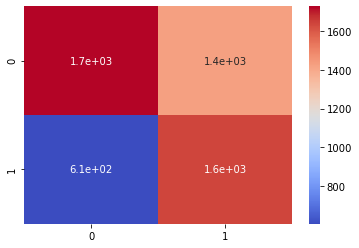

In [185]:
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,cmap='coolwarm')

## Cross-validation

In [186]:
# Apply K-Fold Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,
                            X = X_train,
                            y= y_train,
                            cv = 10)

In [187]:
print(accuracies)

[0.6450168  0.66461366 0.64277716 0.64949608 0.63549832 0.63493841
 0.65826331 0.63641457 0.63529412 0.64593838]


In [188]:
print(np.mean(accuracies))

0.6448250789677574


In [189]:
print(np.std(accuracies))

0.00972508600865725


In [190]:
# Analyze coefficients
pd.concat([pd.DataFrame(X_train.columns,columns=['features']),
          pd.DataFrame(np.transpose(classifier.coef_),columns=['Coefficients'])], axis=1)

,features,Coefficients
0,age,-0.173767
1,deposits,0.142046
2,withdrawal,0.046001
3,purchases_partners,-0.734428
4,purchases,-0.252971
5,cc_taken,0.094182
6,cc_recommended,0.070495
7,cc_disliked,-0.019343
8,cc_liked,-0.012812
9,cc_application_begin,0.022992


## Feature Selections 

In [191]:
# Import libraries
from sklearn.feature_selection import RFE

In [192]:
X_train.shape

(17856, 40)

In [193]:
rfe = RFE(classifier,20)
rfe.fit(X_train,y_train)

/Users/fayezabu-ajamieh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=20)

In [194]:
# Check useful features
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_O', 'housing_R', 'payment_type_Weekly',
       'zodiac_sign_Aquarius'],
      dtype='object')

In [195]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 10, 15,  8, 13,  1,  1,  1,  5,  1,  1,
        1,  1,  1,  1, 18,  1,  1,  3, 21, 14,  1,  1, 16,  2,  4, 19, 12,
       20,  9, 11,  7,  6, 17])

In [196]:
# Refit model with selected features

classifier = LogisticRegression(random_state=0)

classifier.fit(X_train[X_train.columns[rfe.support_]],y_train)

LogisticRegression(random_state=0)

In [197]:
new_predictions = classifier.predict(X_test[X_train.columns[rfe.support_]])

In [198]:
# Evaluate new predictions

print(confusion_matrix(y_test, new_predictions))
print('\n')
print(classification_report(y_test, new_predictions))

[[1698 1456]
 [ 595 1651]]


              precision    recall  f1-score   support

           0       0.74      0.54      0.62      3154
           1       0.53      0.74      0.62      2246

    accuracy                           0.62      5400
   macro avg       0.64      0.64      0.62      5400
weighted avg       0.65      0.62      0.62      5400



<AxesSubplot:>

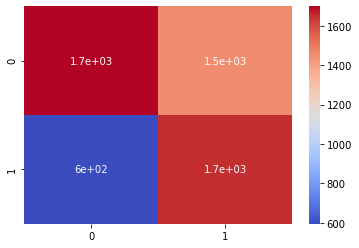

In [199]:
sns.heatmap(confusion_matrix(y_test, new_predictions),annot=True,cmap='coolwarm')

## Final Model

In [200]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_],columns=['features']),
          pd.DataFrame(np.transpose(classifier.coef_),columns=['Coefficients'])], axis=1)

,features,Coefficients
0,age,-0.165577
1,deposits,0.127327
2,withdrawal,0.049726
3,purchases_partners,-0.728569
4,purchases,-0.233056
5,cc_taken,0.091578
6,cc_recommended,0.081285
7,web_user,0.149095
8,ios_user,0.067538
9,registered_phones,0.105800


In [201]:
final_results = pd.concat([y_test,user_identifier], axis=1).dropna()
final_results['Predicted Churn'] = new_predictions
final_results = final_results[['user','churn','Predicted Churn']].reset_index(drop=True)

In [202]:
final_results

,user,churn,Predicted Churn
0,41406,0.0,0
1,30693,0.0,0
2,8381,0.0,0
3,46960,0.0,1
4,42910,0.0,1
...,...,...,...
5395,19540,0.0,1
5396,22377,0.0,0
5397,32870,0.0,1
5398,65830,1.0,1
